In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_curve, precision_score, recall_score, f1_score, auc
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.ticker as mtick # For specifying the axes tick format
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from batchup import data_source
import missingno as msno

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#le nombre de types de variables 
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [9]:
#données aberrantes
data.duplicated().sum() 

0

In [10]:
#df.isnull().sum()
# détection des données manquantes
data.isnull ().sum ().values.sum ()

0

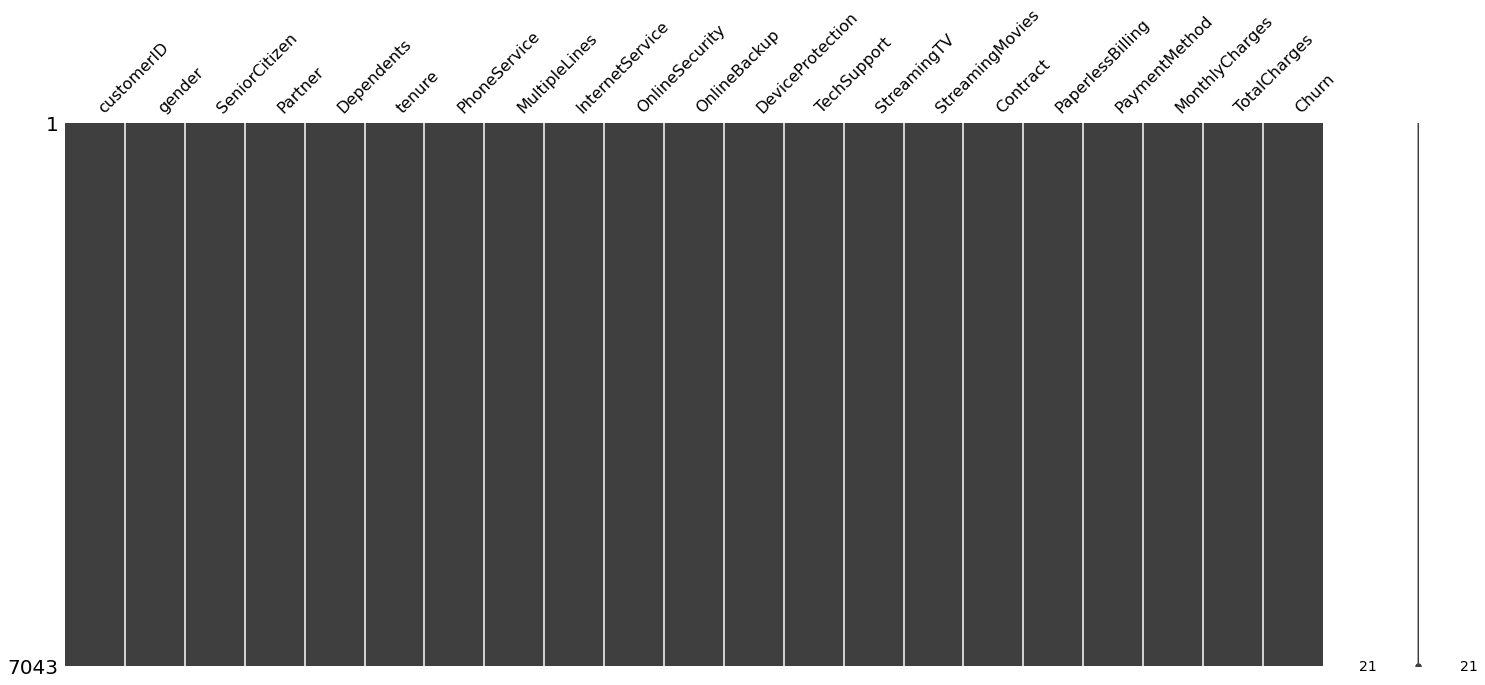

In [11]:
# Visualize missing values as a matrix
msno.matrix(data);

Nous ne voyons pas de valeurs manquantes lorsque nous examinons l'ensemble de données en général , cependant, lorsque nous examinons chaque caractéristique une par une en détail, nous avons compris que la caractéristique "TotalCharges" a quelques valeurs manquantes depuis la conversion de son type de données.

De plus, même si le type de données de la colonne "TotalCharges" est de type objet, elle a des valeurs numériques. Nous devons donc également changer son type de données en type float.

In [12]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [13]:
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


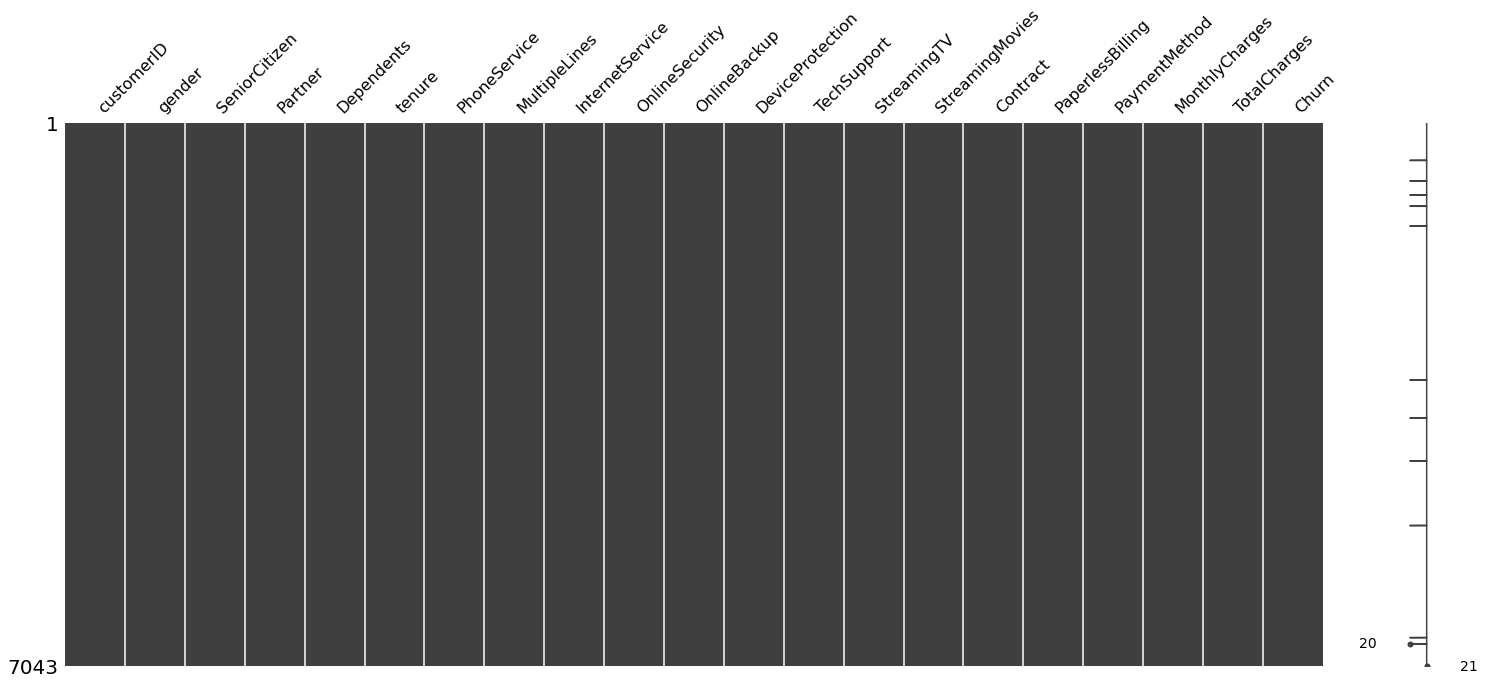

In [14]:
# Visualize missing values as a matrix
msno.matrix(data);

In [15]:
# examination de l'attribut TotalCharges
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
data[data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

suppression des valeur 0 (manquante) dans l'attribut teneur  

In [17]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)


In [18]:
data.fillna(data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Data Visualisation

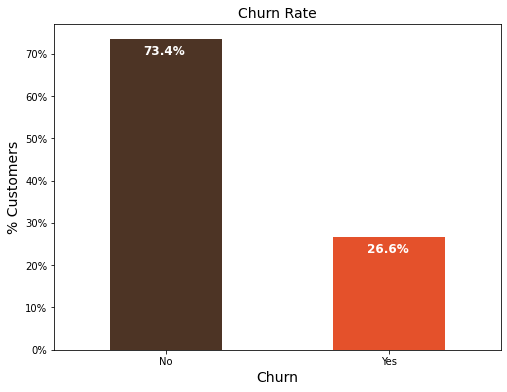

In [19]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

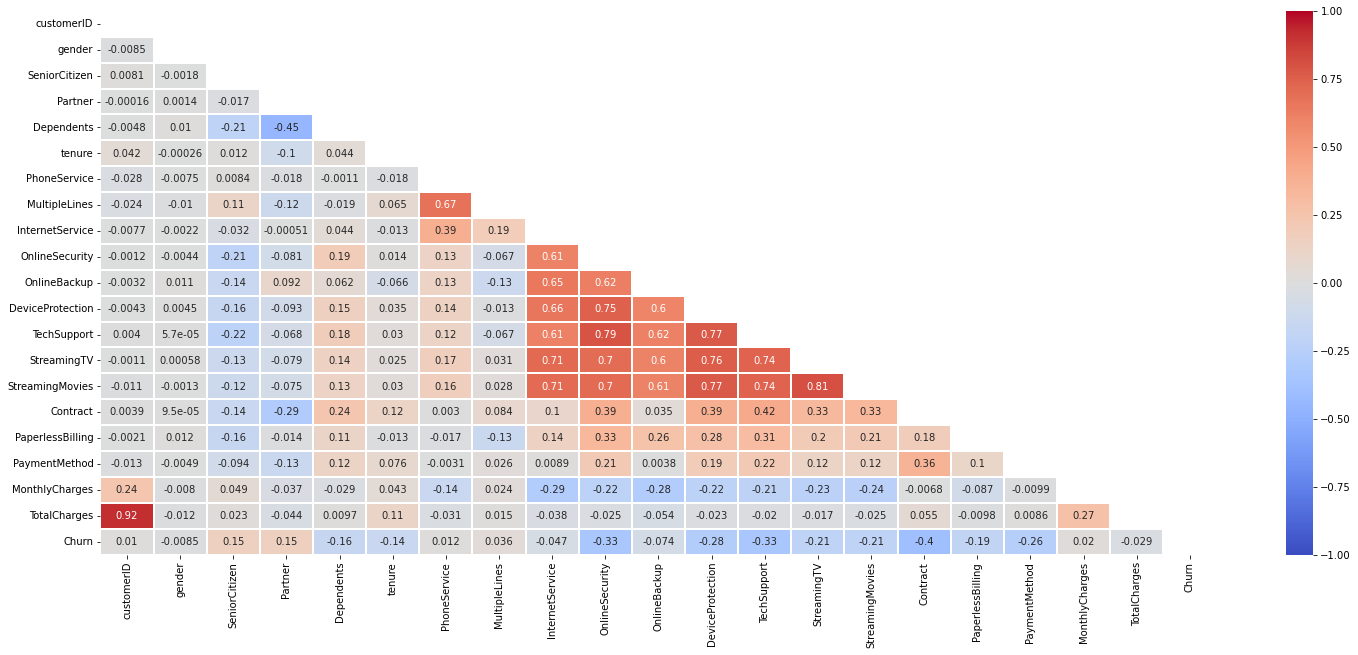

In [20]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [21]:
data = data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Train test split

In [22]:
# converting the non-numeric data into numeric data.
encoded = data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
X = encoded.drop(columns=['Churn'])
y = encoded['Churn'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [25]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [26]:
import time
temps = []
logloss = []

## Modele  NeuralNetwork

In [48]:
class NeuralNetwork:
    def __init__(self, sizes, activation='relu'):
        self.sizes = sizes

        # Choix d'activation fonction
        if activation == 'relu':
            self.activation = self.relu
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
        else:
            raise ValueError("La function d'activation ne support pas.")

        # Save  weights
        self.params = self.initialize()
        # Save  intermediate activation value
        self.cache = {}

    def relu(self, x, derivative=False):
        if derivative:
            x = np.where(x < 0, 0, x)
            x = np.where(x >= 0, 1, x)
            return x
        return np.maximum(0, x)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1.0 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        return 1.0 / (1 + np.exp(-x))

    def initialize(self):
        # number of nodes in each layer
        input_layer = self.sizes[0]
        hidden_layer = self.sizes[1]
        hidden_layer2 = self.sizes[2]
        output_layer = self.sizes[3]

        params = {
            "W1": np.random.randn(hidden_layer, input_layer),
            "b1": np.zeros((hidden_layer, 1)),
            "W2": np.random.randn(hidden_layer2, hidden_layer),
            "b2": np.zeros((hidden_layer2, 1)),
            "W3": np.random.randn(output_layer, hidden_layer2),
            "b3": np.zeros((output_layer, 1))
        }
        return params

    def initialize_momemtum_optimizer(self):
        momemtum_opt = {
            "W1": np.zeros(self.params["W1"].shape),
            "b1": np.zeros(self.params["b1"].shape),
            "W2": np.zeros(self.params["W2"].shape),
            "b2": np.zeros(self.params["b2"].shape),
            "W3": np.zeros(self.params["W3"].shape),
            "b3": np.zeros(self.params["b3"].shape)
        }
        return momemtum_opt

    def initialize_RMS_Prop(self):
        RMS_Prop = {
            "W1": np.zeros(self.params["W1"].shape),
            "b1": np.zeros(self.params["b1"].shape),
            "W2": np.zeros(self.params["W2"].shape),
            "b2": np.zeros(self.params["b2"].shape),
            "W3": np.zeros(self.params["W3"].shape),
            "b3": np.zeros(self.params["b3"].shape)
        }
        return RMS_Prop

    def feed_forward(self, x):
        self.cache["X"] = x
        self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
        self.cache["A1"] = self.activation(self.cache["Z1"])
        self.cache["Z2"] = np.matmul(self.params["W2"], self.cache["A1"]) + self.params["b2"]
        self.cache["A2"] = self.activation(self.cache["Z2"])
        self.cache["Z3"] = np.matmul(self.params["W3"], self.cache["A2"]) + self.params["b3"]
        self.cache["A3"] = self.softmax(self.cache["Z3"])
        return self.cache["A3"]

    def back_propagate(self, y, output):
        current_batch_size = y.shape[0]
        dZ3 = output - y
        dW3 = (1. / current_batch_size) * np.matmul(dZ3, self.cache["A2"].T)
        db3 = (1. / current_batch_size) * np.sum(dZ3, axis=1, keepdims=True)

        dA2 = np.matmul(self.params["W3"].T, dZ3)
        dZ2 = dA2 * self.activation(self.cache["Z2"], derivative=True)
        dW2 = (1. / current_batch_size) * np.matmul(dZ2, self.cache["A1"].T)
        db2 = (1. / current_batch_size) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(self.params["W2"].T, dZ2)
        dZ1 = dA1 * self.activation(self.cache["Z1"], derivative=True)
        dW1 = (1. / current_batch_size) * np.matmul(dZ1, self.cache["X"])
        db1 = (1. / current_batch_size) * np.sum(dZ1, axis=1, keepdims=True)
        self.grads = {"W1": dW1, "b1": db1, "W2": dW2, "b2": db2, "W3": dW3, "b3": db3}
        return self.grads

    def optimize(self, l_rate=0.01, beta1=0.9, beta2=0.999, t=0):
        if self.optimizer == 'adam':
            for i in self.params:
                self.momemtum_opt[i] = (beta1 * self.momemtum_opt[i] + (1. - beta1) * self.grads[i])
                self.RMS_Prop[i] = (beta2 * self.RMS_Prop[i] + (1. - beta2) * self.grads[i] ** 2)
                # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
                mhat = self.momemtum_opt[i] / (1.0 - np.power(beta1, t + 1))
                # vhat(t) = v(t) / (1 - beta2(t))
                vhat = self.RMS_Prop[i] / (1.0 - np.power(beta2, t + 1))
                self.params[i] = self.params[i] - l_rate * mhat / (np.sqrt(vhat) + 0.00000001)

        elif self.optimizer == 'momentum':     
            for i in self.params:
                self.momemtum_opt[i] = (beta1 * self.momemtum_opt[i] + (1. - beta1) * self.grads[i])
                self.params[i] = self.params[i] - l_rate * self.momemtum_opt[i]

        else:
            raise ValueError("L'optimiseur n'est actuellement pas supporté.")

    def predict(self, y_train, out):
        y_p = []
        for element in out.T:
            if element > 0.5:
                y_p.append(1)
            else:
                y_p.append(0)
        return accuracy_score(y_train, y_p)
    

    def fit(self, x_train, y_train, epochs, optimizer, l_rate, beta1, beta2):
        # Hyperparameters
        self.epochs = epochs
        # Initialize optimizer
        self.optimizer = optimizer
        if self.optimizer == 'adam':
            self.momemtum_opt = self.initialize_momemtum_optimizer()
            self.RMS_Prop = self.initialize_RMS_Prop()
        elif self.optimizer == 'momentum':
            self.momemtum_opt = self.initialize_momemtum_optimizer()
        else:
            raise ValueError("L'optimiseur n'est actuellement pas supporté..")
        start_time = time.time()
        # Construction array data source
        ds = data_source.ArrayDataSource([x_train, y_train])
        # Train
        for i in range(self.epochs):

            for (batch_X, batch_y) in ds.batch_iterator(batch_size=64, shuffle=True):
                # Forward
                output = self.feed_forward(batch_X)
                # Backprop
                self.back_propagate(batch_y, output)
                # Optimize
                self.optimize(l_rate=l_rate, beta1=beta1, beta2=beta2, t=0)

            # Evaluate performance
            # Training data
            output = self.feed_forward(x_train)
            train_acc = self.predict(y_train, output)
            train_loss = log_loss(y_train, output.T)
            print("Epoch:%2d, train_acc=%.5f, Train_loss=%.5f" % (i, train_acc, train_loss))
        print("Temps:%2f" % (time.time()-start_time))
        temps.append(time.time()-start_time)



## Modele SVM

In [28]:
class SVM_classifier:
    # Modèle Machine à vecteurs de support
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    # entrainement de modèle
    def fit(self, X, Y):
        # m --> nombre de points de données --> nombre de lignes
        # n --> nombre de caractéristiques d'entrée --> nombre de colonnes
        self.m, self.n = X.shape
        # initialisation de la valeur du poids et de la valeur du biais
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        start_time = time.time()
        # Implémentation de l'algorithme de descente de gradient pour l'optimisation.
        for i in range(self.no_of_iterations):
            self.update_weights()
        print("Temps:%2f" % (time.time()-start_time)) 
        temps.append(time.time()-start_time)

    # fonction de mise à jour du poids et du biais
    def update_weights(self):
        # encodage des étiquettes churn = 0 => -1/churn = 1 => 1
        y_label = np.where(self.Y <= 0, -1, 1)
        # calcul du gradients ( dw, db)
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1  # fonction cout (hinge loss function)
            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    # la prédiction des classe des échantillons de test
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat



## Modele LogisticRegression 

In [29]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1500, weights=None, bias=None):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialiser les poids, le biais et la liste  perte avec des zéros
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.loss = []
        start_time = time.time()
        for _ in range(self.n_iters):
            # définition de modèle linéaire
            z = np.dot(X, self.weights) + self.bias
            # application de la fonction segmoide
            y_hat = self._sigmoid(z)
            # Fonction  coût
            cost = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / n_samples
            # Suivi de pertes
            self.loss.append(cost)
            # calcul du gradient
            dw = (1.0 / n_samples) * 2 * np.dot(X.T, (y_hat - y))
            db = (1.0 / n_samples) * 2 * np.sum(y_hat - y)
            # mise à jour des poids et bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        print("Temps:%2f" % (time.time()-start_time))  
        temps.append(time.time()-start_time)

        return None

    def predict_proba(self, X):
        
        z = np.dot(X, self.weights) + self.bias
        y_pred_proba = self._sigmoid(z)
        return y_pred_proba

    def predict(self, X):
        
        threshold=0.5
        y_pred_proba = self.predict_proba(X)
        y_pred = [1 if x >= threshold else 0 for x in y_pred_proba]
        return y_pred

    def _sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))

train and test NeuralNetwork

In [49]:
dnn = NeuralNetwork(sizes=[19, 64, 64, 1], activation='relu')
dnn.fit(X_train, y_train, 200, 'adam', 0.01, 0.9, 0.999)

Epoch: 0, train_acc=0.72816, Train_loss=4.84247
Epoch: 1, train_acc=0.72958, Train_loss=4.08301
Epoch: 2, train_acc=0.74523, Train_loss=3.55829
Epoch: 3, train_acc=0.73588, Train_loss=3.17462
Epoch: 4, train_acc=0.73304, Train_loss=3.12434
Epoch: 5, train_acc=0.74970, Train_loss=2.98009
Epoch: 6, train_acc=0.71556, Train_loss=2.51444
Epoch: 7, train_acc=0.73243, Train_loss=2.28133
Epoch: 8, train_acc=0.75356, Train_loss=2.12524
Epoch: 9, train_acc=0.72633, Train_loss=1.93623
Epoch:10, train_acc=0.71475, Train_loss=1.90170
Epoch:11, train_acc=0.72714, Train_loss=1.70941
Epoch:12, train_acc=0.72918, Train_loss=1.52447
Epoch:13, train_acc=0.74279, Train_loss=1.46958
Epoch:14, train_acc=0.76493, Train_loss=1.35368
Epoch:15, train_acc=0.70419, Train_loss=1.32204
Epoch:16, train_acc=0.75721, Train_loss=1.16206
Epoch:17, train_acc=0.74726, Train_loss=1.07155
Epoch:18, train_acc=0.73933, Train_loss=1.03865
Epoch:19, train_acc=0.74604, Train_loss=0.96563
Epoch:20, train_acc=0.75924, Train_loss=

log_test:0.42567, accuracy:0.80000
[0.8]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.69      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.76      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



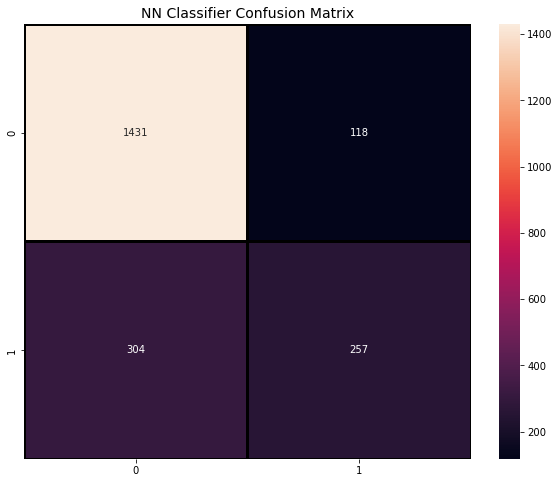

In [50]:
predict = dnn.feed_forward(X_test)
log = log_loss(y_test, predict.T)
accuracy = dnn.predict(y_test, predict)
scores = []


print("log_test:%.5f, accuracy:%.5f" %(log, accuracy))
scores.append(accuracy)
logloss.append(log)
print(scores)
y_pred = []
for element in predict.T:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("NN Classifier Confusion Matrix", fontsize=14)
plt.show()

In [32]:
predict_prob = dnn.feed_forward(X_test)
print(predict_prob)


[[0.02722163 0.25960818 0.26405931 ... 0.01249603 0.04135087 0.51167604]]


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, predict_prob.T)

0.8366227880905281


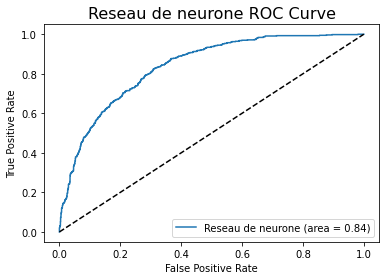

In [34]:
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr,  label='Reseau de neurone (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reseau de neurone ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

In [35]:
# defiition du modèle
classifier = SVM_classifier(learning_rate=0.01, no_of_iterations=1500, lambda_parameter=0.01)
# entrainement du modèle
classifier.fit(X_train, y_train)

#accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)
 #accuracy on test data
y_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print('Accuracy score on test data = ', test_data_accuracy)
print('log_loss =', log_loss(y_test, y_test_prediction)) 
logloss.append(log_loss(y_test, y_test_prediction))

Temps:240.154724
Accuracy score on training data =  0.7819991873222267
Accuracy score on test data =  0.7777251184834123
log_loss = 7.677184664386475


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.59      0.55      0.57       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.78      0.78      2110



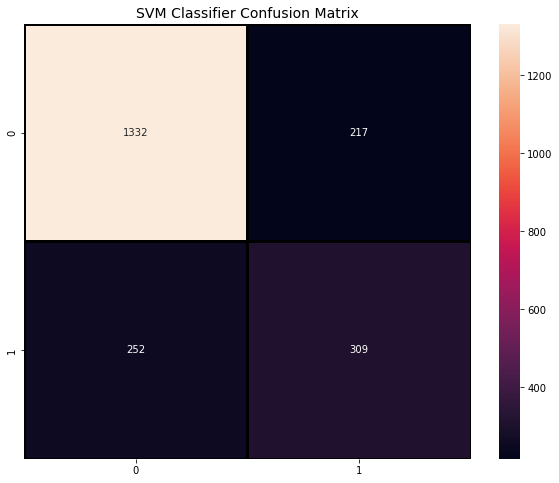

In [36]:
print(classification_report(y_test, y_test_prediction))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_test_prediction),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("SVM Classifier Confusion Matrix", fontsize=14)
plt.show()

In [37]:
# dédinition du modèle
clf = LogisticRegression(learning_rate=0.01, n_iters=1500, weights=None, bias=None)
# entrainement du  model
clf.fit(X_train, y_train)
# prédiction de la classe
y_pred = clf.predict(X_test)
# prédiction de la probabilité
y_pred_proba = clf.predict_proba(X_test)

X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)

y_pred = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score on test data = ', test_data_accuracy)
print('log_loss =', log_loss(y_test, y_pred_proba)) 
logloss.append(log_loss(y_test, y_pred_proba))

Temps:0.982878
Accuracy score on training data =  0.8031288094270622
Accuracy score on test data =  0.8004739336492891
log_loss = 0.42259316635638816


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



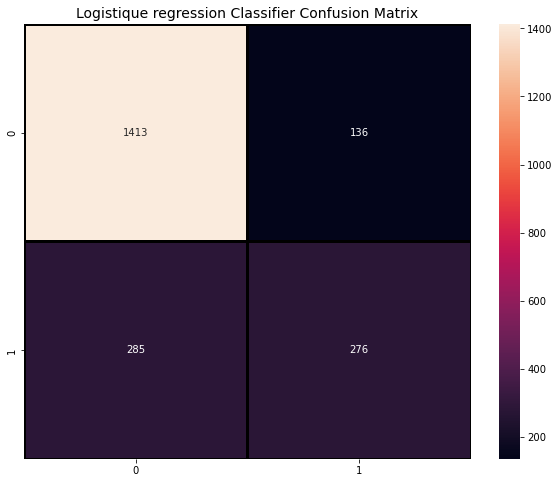

In [38]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test,  y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Logistique regression Classifier Confusion Matrix", fontsize=14)
plt.show()

0.8402091395863469


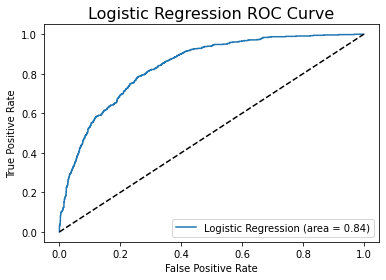

In [39]:
y_pred_prob = clf.predict_proba(X_test)[:]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr,  label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

In [40]:
print(temps)

[31.953503131866455, 240.1547236442566, 0.9828784465789795]


In [51]:
names = ["NeuralNetwork","SVM_classifier", "LogisticRegression"]

classifiers = [
    SVM_classifier(learning_rate=0.01, no_of_iterations=1500, lambda_parameter=0.01),
    LogisticRegression(learning_rate=0.01, n_iters=1500, weights=None, bias=None)
     ]

In [52]:
for name, clf, log in zip(names, classifiers,logloss):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)


Temps:107.307167
Temps:0.705758


In [53]:
print(scores)

[0.8, 0.7777251184834123, 0.8004739336492891]


In [54]:
df = pd.DataFrame()
df['name'] = names
df['accuracy'] = scores


In [55]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,accuracy
0,NeuralNetwork,0.800000
1,SVM_classifier,0.777725
2,LogisticRegression,0.800474


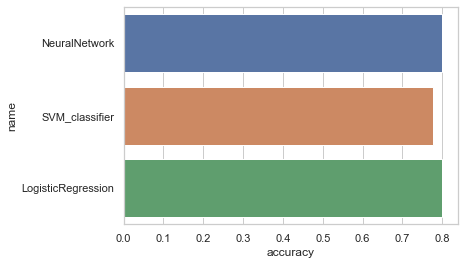

In [56]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="accuracy", data=df)